In [142]:
import pandas as pd
from pandas_profiling import  ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [143]:
df=pd.read_csv('FK order Details.csv')

In [144]:
df.head()

,OrderId,ItemId,ProductName,Price,Order_status,Date_Delevered,Colour,Size,Seller
0,OD120593633348869000,1.20594E+16,Okra Diwan Bed Engineered Wood Single Bo...,"8,490",Delivery,Jan 21 2021,Colour Not Available,Size Not Applicable,Okra Furniture
1,OD120504318790984000,1.20504E+16,Google Nest Mini (2nd Gen) with Google A...,"2,299",Delivered,Dec 19 2020,Black,Size Not Applicable,RetailNet
2,OD120432604915008000,1.20433E+16,Jockey Men Brief,508,Delivered,Dec 14 2020,Multicolor,S,FORBESKART
3,OD120109581460472000,1.2011E+16,Lenovo IdeaPad Gaming 3i Core i5 10th Ge...,"61,890 + 100",Delivered,Nov 09 2020,Onyx Black,Size Not Applicable,PETILANTE Online
4,OD119978132602261000,1.19978E+16,boAt Rockerz 235v2 Bluetooth Headset,799,Delivered,Oct 27 2020,Red,Size Not Applicable,CORSECA


In [145]:
df.tail()

,OrderId,ItemId,ProductName,Price,Order_status,Date_Delevered,Colour,Size,Seller
114,OD302579622427827000,OI100025796308439373,SanDisk 4 GB MicroSDHC Class 4 Memory C...,199,Cancelled,May 04 2015,Colour Not Available,Size Not Applicable,WS Retail
115,OD302215052491035001,OI300022150525891126,Koloredge Flip Cover for Honor Holly,160,Delivered,Mar 05 2015,Yellow,Size Not Applicable,AyushmanEnterprises
116,OD302215052491035000,OI000022150525888037,Huawei E8231/E8231s-1 Data Card,"1,980",Delivered,Mar 05 2015,White,Size Not Applicable,WS Retail
117,OD101808248102435300,OI000018082481444145,"Honor Holly (Black/White, 16 GB)","6,999",Delivered,Jan 17 2015,White,Size Not Applicable,WS Retail
118,OD301564358108031200,OI300015643581348638,Ncert Solutions Mathematics 12th,214,Delivered,Dec 19 2014,Colour Not Available,Size Not Applicable,WS Retail


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderId         119 non-null    object
 1   ItemId          119 non-null    object
 2   ProductName     119 non-null    object
 3   Price           119 non-null    object
 4   Order_status    119 non-null    object
 5   Date_Delevered  119 non-null    object
 6   Colour          119 non-null    object
 7   Size            119 non-null    object
 8   Seller          119 non-null    object
dtypes: object(9)
memory usage: 8.5+ KB


In [147]:
df.describe()

,OrderId,ItemId,ProductName,Price,Order_status,Date_Delevered,Colour,Size,Seller
count,119,119,119,119,119,119,119,119,119
unique,118,108,106,102,4,84,25,19,47
top,OD113785735897818000,1.19615E+16,Flipkart SmartBuy Rich Bass Wired Metal ...,199,Delivered,Jan 16 2018,Black,Size Not Applicable,RetailNet
freq,2,3,3,3,92,6,30,84,33


In [148]:
#Creating Year , Month , Date colums 
df['year']=df['Date_Delevered'].str.split(' ').apply(lambda x:x[2])
df['month']=df['Date_Delevered'].str.split(' ').apply(lambda x:x[0])
df['date']=df['Date_Delevered'].str.split(' ').apply(lambda x:x[1])

In [149]:
df.head()

,OrderId,ItemId,ProductName,Price,Order_status,Date_Delevered,Colour,Size,Seller,year,month,date
0,OD120593633348869000,1.20594E+16,Okra Diwan Bed Engineered Wood Single Bo...,"8,490",Delivery,Jan 21 2021,Colour Not Available,Size Not Applicable,Okra Furniture,2021,Jan,21
1,OD120504318790984000,1.20504E+16,Google Nest Mini (2nd Gen) with Google A...,"2,299",Delivered,Dec 19 2020,Black,Size Not Applicable,RetailNet,2020,Dec,19
2,OD120432604915008000,1.20433E+16,Jockey Men Brief,508,Delivered,Dec 14 2020,Multicolor,S,FORBESKART,2020,Dec,14
3,OD120109581460472000,1.2011E+16,Lenovo IdeaPad Gaming 3i Core i5 10th Ge...,"61,890 + 100",Delivered,Nov 09 2020,Onyx Black,Size Not Applicable,PETILANTE Online,2020,Nov,09
4,OD119978132602261000,1.19978E+16,boAt Rockerz 235v2 Bluetooth Headset,799,Delivered,Oct 27 2020,Red,Size Not Applicable,CORSECA,2020,Oct,27


In [150]:
df['Price']=df['Price'].str.replace(',','')

In [151]:
df['Price'] = df['Price'].apply(pd.eval)

In [152]:
df.Price.head()

0     8490.0
1     2299.0
2      508.0
3    61990.0
4      799.0
Name: Price, dtype: float64

In [153]:
df.head()

,OrderId,ItemId,ProductName,Price,Order_status,Date_Delevered,Colour,Size,Seller,year,month,date
0,OD120593633348869000,1.20594E+16,Okra Diwan Bed Engineered Wood Single Bo...,8490.0,Delivery,Jan 21 2021,Colour Not Available,Size Not Applicable,Okra Furniture,2021,Jan,21
1,OD120504318790984000,1.20504E+16,Google Nest Mini (2nd Gen) with Google A...,2299.0,Delivered,Dec 19 2020,Black,Size Not Applicable,RetailNet,2020,Dec,19
2,OD120432604915008000,1.20433E+16,Jockey Men Brief,508.0,Delivered,Dec 14 2020,Multicolor,S,FORBESKART,2020,Dec,14
3,OD120109581460472000,1.2011E+16,Lenovo IdeaPad Gaming 3i Core i5 10th Ge...,61990.0,Delivered,Nov 09 2020,Onyx Black,Size Not Applicable,PETILANTE Online,2020,Nov,09
4,OD119978132602261000,1.19978E+16,boAt Rockerz 235v2 Bluetooth Headset,799.0,Delivered,Oct 27 2020,Red,Size Not Applicable,CORSECA,2020,Oct,27


In [154]:
df['Date_Delevered']=df['year'].str.cat(df['month'], sep =" ").str.cat(df['date'], sep =" ")  

In [155]:
df['Date_Delevered'] = pd.to_datetime(df['Date_Delevered'], format='%Y %b %d')

In [156]:
df['date_category']=df['date'].apply(lambda x: 'Starting_Week' if (x in ['01','02','03','04','05','06','07']) else ('Month_Middle' if (x in ['08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']) else 'Last_Week'))

In [157]:
#year2020=df[(df.year=='2020') & (df.Date_Delevered>2020-6-6)]
in_range_df = df[df["Date_Delevered"].isin(pd.date_range("2020-06-01", "2020-12-31")) & (df.year=='2020') ]

In [158]:
in_range_df.shape[0]

21

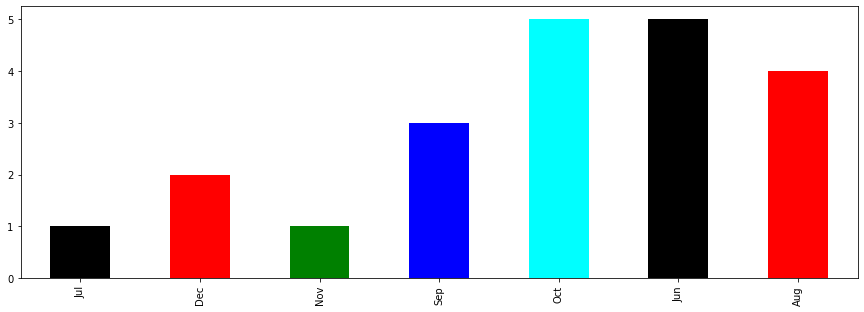

In [159]:
plt.figure(figsize=(15,5))
in_range_df['month'].value_counts(sort=False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

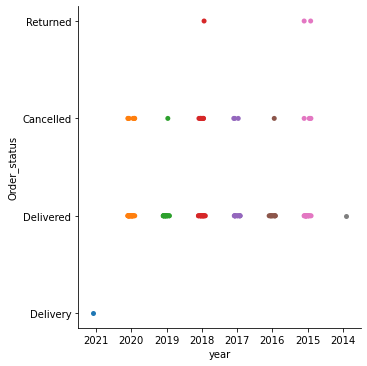

In [160]:
sns.catplot(x='year',y='Order_status',data=df)

In [161]:
df['Target']=df['Order_status'].apply(lambda x: 1 if x=='Delivered' else 0 )

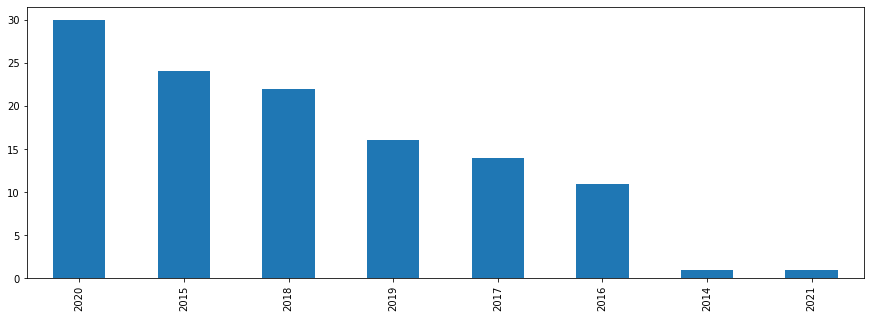

In [162]:
plt.figure(figsize=(15,5))
df['year'].value_counts(sort=True).plot.bar()

plt.show()

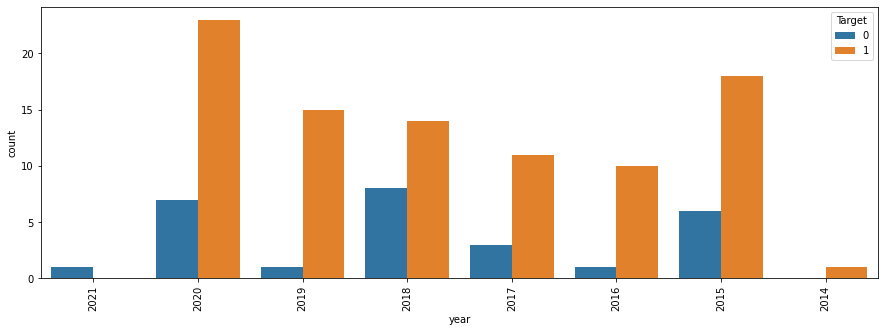

In [163]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["year"],hue=df.Target)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [164]:
df.month.value_counts()

Jan    16
Oct    16
Aug    13
May    11
Mar    11
Dec    10
Nov     9
Sep     9
Feb     9
Jun     8
Apr     4
Jul     3
Name: month, dtype: int64

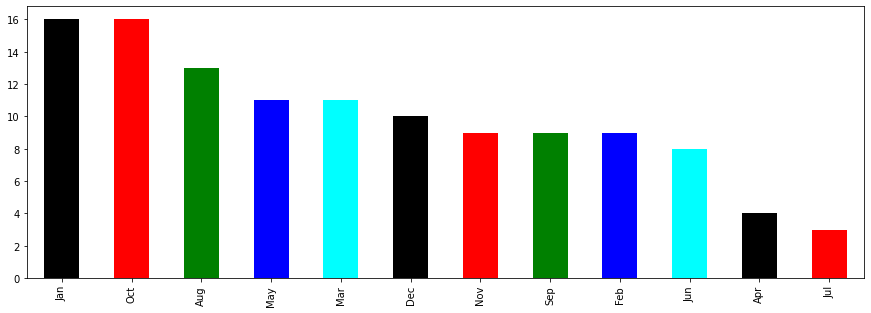

In [165]:
plt.figure(figsize=(15,5))
df['month'].value_counts(sort=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

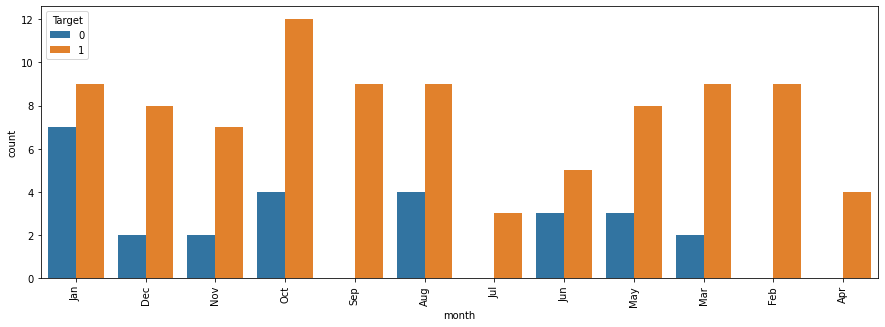

In [166]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["month"],hue=df.Target)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

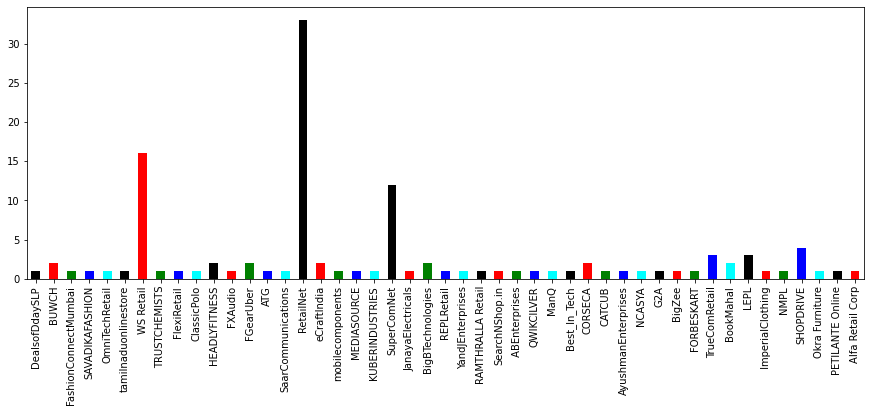

In [167]:
plt.figure(figsize=(15,5))
df['Seller'].value_counts(sort=False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

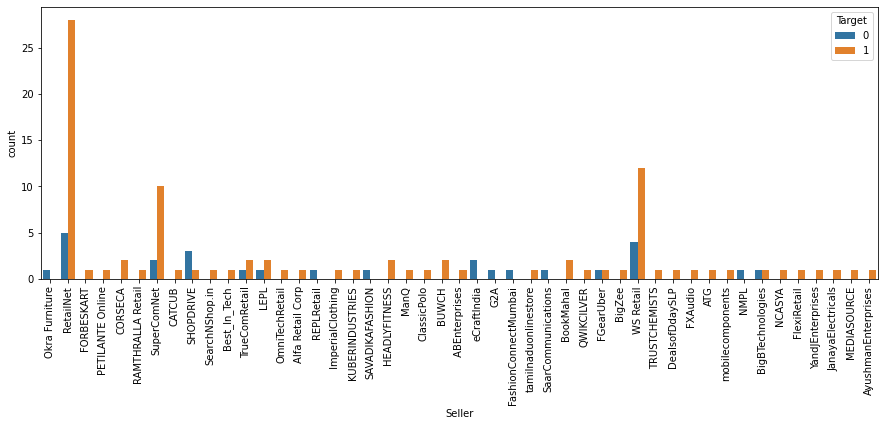

In [168]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df["Seller"],hue=df.Target)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

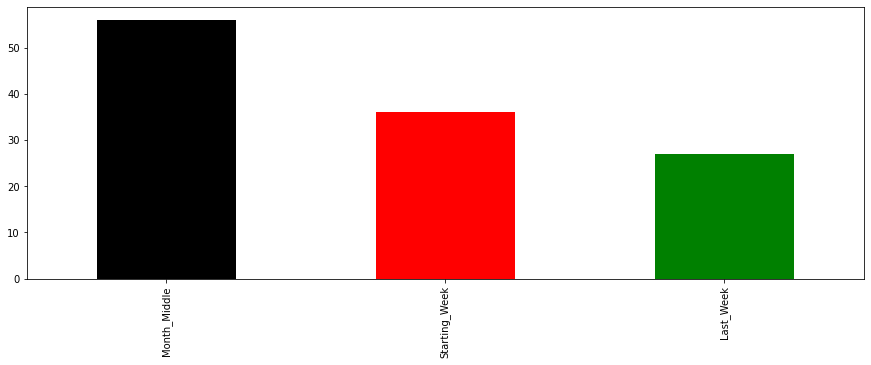

In [169]:
plt.figure(figsize=(15,5))
df['date_category'].value_counts(sort=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

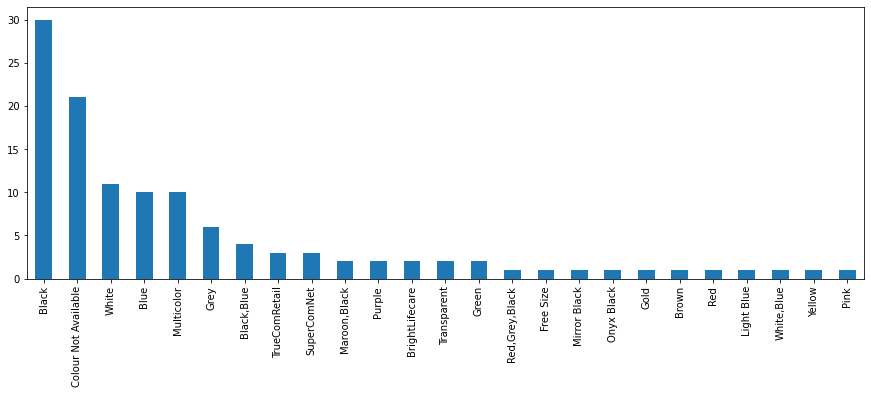

In [170]:
plt.figure(figsize=(15,5))
df['Colour'].value_counts(sort=True).plot.bar()
plt.show()

In [171]:
df['Colour']=df['Colour'].replace(['Onyx Black','Mirror Black','Black,Blue'],'Black')
df['Colour']=df['Colour'].replace(['TrueComRetail','Free Size','SuperComNet','FreeSize'],'Invalid Data')

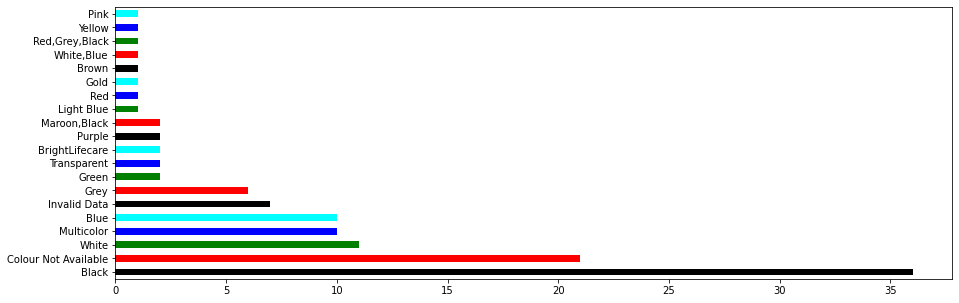

In [172]:
plt.figure(figsize=(15,5))
df['Colour'].value_counts(sort=True).plot.barh(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

In [173]:
#Perforning all the data checks with Profile Report Library
profile=ProfileReport(df,explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Insights Obtained:

Total Order Placed = 119 

        Deliverd   = 93
        Cancelled  = 23
        Returned   = 03
        
First Order Date   = Dec 12 2021


Recent Order Date  = Jan 21 2021

Max priced order   = 61990

Min priced order   = 50

Avg price/order    = 1890


Most ordered seller = RetailNet

Colour preferred    = Black

Most ordered in year  = 2020

Min ordered in year   = 2014

Month Most order placed  = October and January

Orders from past 6 months =21



# Conclusion :-
    
    I seem to order more from RetailNet seller and I prefer black colour
    Orders placed more in January and October month because of Big Billion Day and New Year Offer Sales.
    More orders are placed in Middle of the month.
    Order category is Mainly Electronics and Wearables.
    
    So ads can be shown based on these shapping patterns